# Business Problem

As a marketing agency our primary objective is to maximize the return on investment(ROI) for our clients' advertising campaigns. We have conducted two campaigns, one on facebook and the other on Adwords and we need to determine which platform yields better results in terms of of clicks,conversions, and overall cost-effectiveness. By identifyimg the most effective platform, we can allocate our resources more efficiently and optimize our advertizing strategies to deliver better outcomes for our clients.

# Research question

Which ad platform is more effective in terms of conversions,clicks and overall cost effectiveness?

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import coint
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the dataset
df = pd.read_csv('marketing_campaign.csv')

In [3]:
#data head
df.head()

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks)
0,1/1/2019,FB_Jan19,2116,18,8,$126,0.83%,42.73%,$7.14,AW_Jan19,4984,59,5,$194,1.18%,8.40%,$3.30
1,1/2/2019,FB_Jan19,3106,36,12,$104,1.15%,34.04%,$2.91,AW_Jan19,4022,71,6,$75,1.77%,7.80%,$1.05
2,1/3/2019,FB_Jan19,3105,26,8,$102,0.84%,31.45%,$3.89,AW_Jan19,3863,44,4,$141,1.13%,9.59%,$3.23
3,1/4/2019,FB_Jan19,1107,27,9,$71,2.45%,34.76%,$2.62,AW_Jan19,3911,49,5,$141,1.26%,11.08%,$2.86
4,1/5/2019,FB_Jan19,1317,15,7,$78,1.10%,47.59%,$5.38,AW_Jan19,4070,55,7,$133,1.36%,12.22%,$2.40


In [24]:
#rows and columns in the dataset
df.shape

(365, 17)

In [4]:
#find out the datatypes of each column
df.dtypes

Date                                               object
Facebook Ad Campaign                               object
Facebook Ad Views                                   int64
Facebook Ad Clicks                                  int64
Facebook Ad Conversions                             int64
Cost per Facebook Ad                               object
Facebook Click-Through Rate (Clicks / View)        object
Facebook Conversion Rate (Conversions / Clicks)    object
Facebook Cost per Click (Ad Cost / Clicks)         object
AdWords Ad Campaign                                object
AdWords Ad Views                                    int64
AdWords Ad Clicks                                   int64
AdWords Ad Conversions                              int64
Cost per AdWords Ad                                object
AdWords Click-Through Rate (Clicks / View)         object
AdWords Conversion Rate (Conversions / Click)      object
AdWords Cost per Click (Ad Cost / Clicks)          object
dtype: object

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df.describe()

,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions
count,365.000000,365.000000,365.000000,365.00000,365.000000,365.000000
mean,2179.687671,44.049315,11.742466,4717.19726,60.383562,5.980822
std,618.074639,12.140559,2.924786,561.11406,14.368225,1.628106
min,1050.000000,15.000000,5.000000,3714.00000,31.000000,3.000000
25%,1656.000000,35.000000,10.000000,4247.00000,49.000000,5.000000
50%,2202.000000,43.000000,12.000000,4711.00000,60.000000,6.000000
75%,2717.000000,54.000000,13.000000,5190.00000,73.000000,7.000000
max,3320.000000,73.000000,19.000000,5760.00000,89.000000,9.000000


# Comparing Campaign Performance

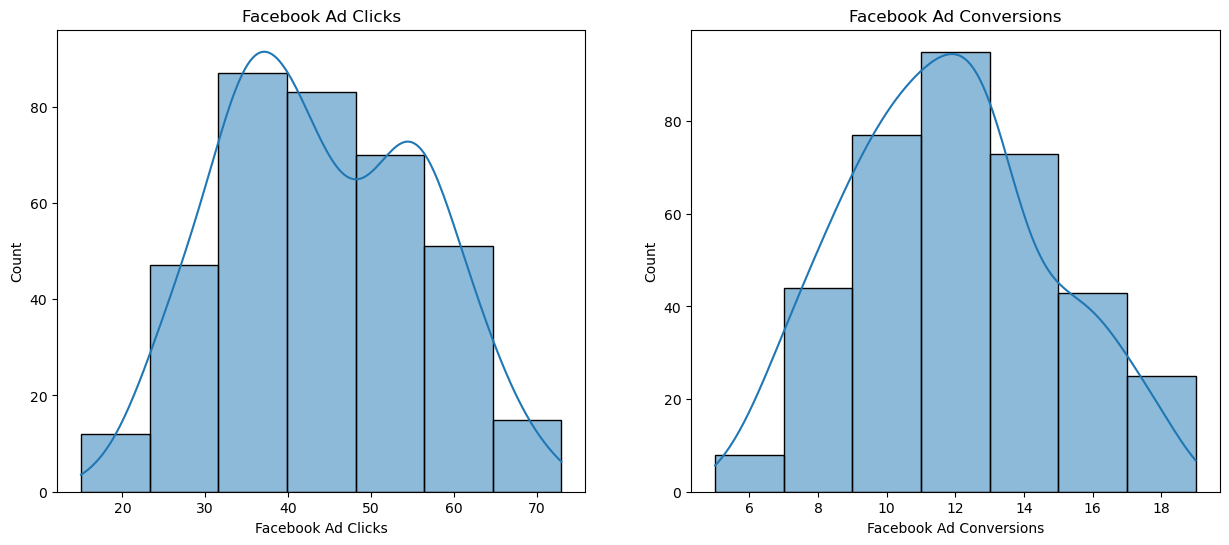

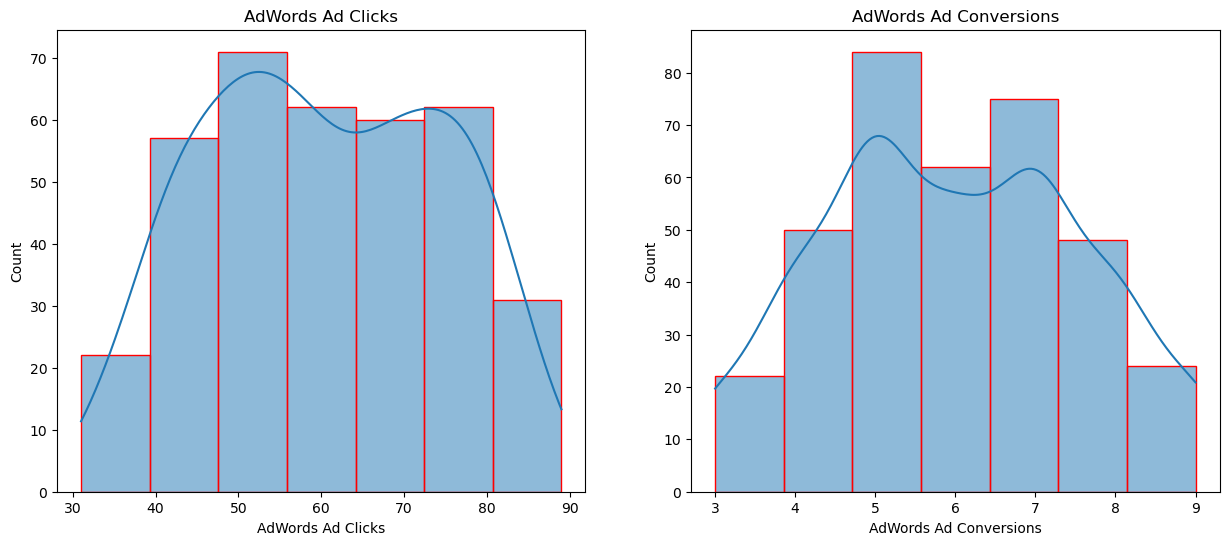

In [8]:
#histogram of conversion and clicks for facebook ad campaign
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Facebook Ad Clicks')
sns.histplot(df['Facebook Ad Clicks'],bins=7,edgecolor='k',kde = True)
plt.subplot(1,2,2)
plt.title('Facebook Ad Conversions')
sns.histplot(df['Facebook Ad Conversions'],bins=7,edgecolor='k',kde= True)
plt.show()

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('AdWords Ad Clicks')
sns.histplot(df['AdWords Ad Clicks'],bins=7,edgecolor='red',kde=True)
plt.subplot(1,2,2)
plt.title('AdWords Ad Conversions')
sns.histplot(df['AdWords Ad Conversions'],bins=7,edgecolor='red',kde=True)
plt.show()


Histograms are somewhat symmetrical shape which suggests that number of clicks and conversions are evenly distributed and there are not many clicks which are outliers.

Q  How frequently do we observe days with high numbers of conversions compared 

In [9]:
#creating function to calculate the category for conversions
def create_conversion_category(conversion_col):
    category=[]
    for conv in df[conversion_col]:
        if conv < 6:
            category.append('less than 6')
        elif 6 <= conv < 11:
            category.append('6 - 10')
        elif 11 <= conv <16:
            category.append('10 - 15')
        else:
            category.append('more than 15')
    return category

#creating column for different categories for both campaigns
df['Facebook Conversion Category'] = create_conversion_category('Facebook Ad Conversions')
df['AdWords Conversion Category'] = create_conversion_category('AdWords Ad Conversions')

In [10]:
df[['Facebook Ad Conversions','Facebook Conversion Category','AdWords Ad Conversions','AdWords Conversion Category']].head()

,Facebook Ad Conversions,Facebook Conversion Category,AdWords Ad Conversions,AdWords Conversion Category
0,8,6 - 10,5,less than 6
1,12,10 - 15,6,6 - 10
2,8,6 - 10,4,less than 6
3,9,6 - 10,5,less than 6
4,7,6 - 10,7,6 - 10


In [11]:
df['Facebook Conversion Category'].value_counts()

10 - 15         189
6 - 10          128
more than 15     47
less than 6       1
Name: Facebook Conversion Category, dtype: int64

In [12]:
facebook = pd.DataFrame(df['Facebook Conversion Category'].value_counts()).reset_index().rename(columns={'index':'Category','Facebook Conversion Category':'Count'})
facebook

,Category,Count
0,10 - 15,189
1,6 - 10,128
2,more than 15,47
3,less than 6,1


In [48]:
#pd.DataFrame(df['Facebook Conversion Category'].value_counts())

In [13]:
df['AdWords Conversion Category'].value_counts()

6 - 10         209
less than 6    156
Name: AdWords Conversion Category, dtype: int64

In [14]:
adwords = pd.DataFrame(df['AdWords Conversion Category'].value_counts()).reset_index().rename(columns={'index':'Category','AdWords Conversion Category':'Count'})
adwords

,Category,Count
0,6 - 10,209
1,less than 6,156


In [15]:
category_df = pd.merge(facebook,adwords,on = 'Category',how = 'outer').fillna(0)
category_df

,Category,Count_x,Count_y
0,10 - 15,189,0.0
1,6 - 10,128,209.0
2,more than 15,47,0.0
3,less than 6,1,156.0


In [16]:
category_df = category_df.iloc[[3,1,0,2]]
category_df

,Category,Count_x,Count_y
3,less than 6,1,156.0
1,6 - 10,128,209.0
0,10 - 15,189,0.0
2,more than 15,47,0.0


In [17]:
#for arranging index
X_axis = np.arange(len(category_df))
X_axis

array([0, 1, 2, 3])

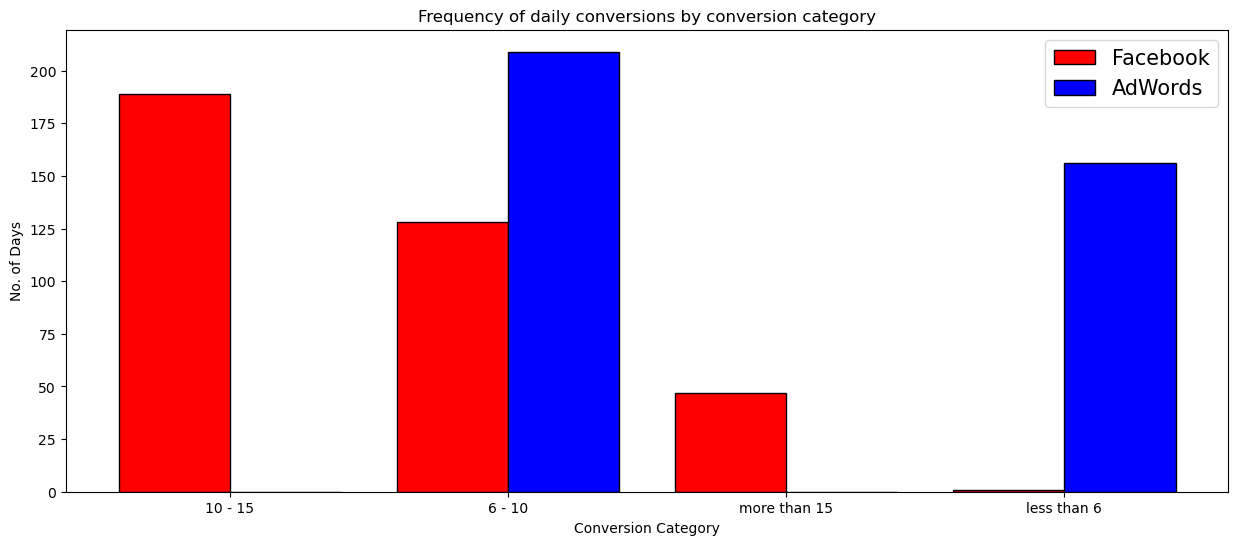

In [14]:
plt.figure(figsize=(15,6))
plt.bar(X_axis - 0.2, category_df['Count_x'],0.4, label = 'Facebook',color = 'red', linewidth =1,edgecolor = 'k')
plt.bar(X_axis + 0.2, category_df['Count_y'],0.4, label = 'AdWords',color = 'blue', linewidth =1,edgecolor = 'k')

#0.4 is bar width
plt.xticks(X_axis,category_df['Category'])
plt.xlabel('Conversion Category')
plt.ylabel('No. of Days')
plt.title('Frequency of daily conversions by conversion category')
plt.legend(fontsize =15)
plt.show()

Interpretation:
The above graph suggests that Facebook had higher conversion days than Adwords. There is a significant variance in the number of higher conversion days between two campaigns.

# Do more clicks on the ad really need to more sales?

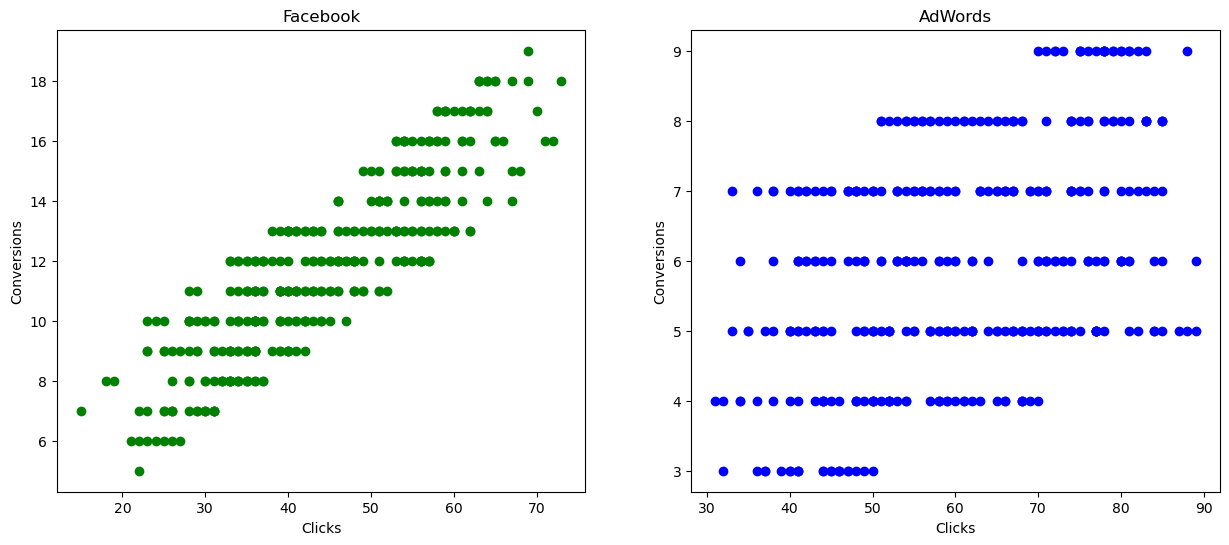

In [18]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.title('Facebook')
plt.scatter(x=df['Facebook Ad Clicks'],y=df['Facebook Ad Conversions'],color='green')
plt.xlabel('Clicks')
plt.ylabel('Conversions')

plt.subplot(1,2,2)
plt.title('AdWords')
plt.scatter(x=df['AdWords Ad Clicks'],y=df['AdWords Ad Conversions'],color='blue')
plt.xlabel('Clicks')
plt.ylabel('Conversions')
plt.show()

# Correlation heatmaps

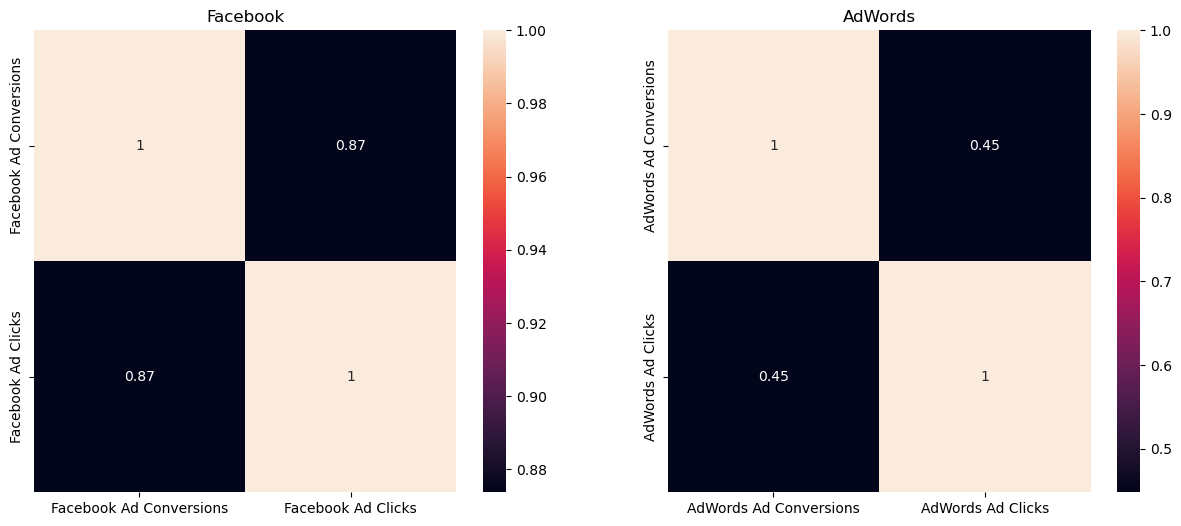

In [19]:
facebook_corr = df[['Facebook Ad Conversions','Facebook Ad Clicks']].corr()
facebook_corr

adwords_corr = df[['AdWords Ad Conversions','AdWords Ad Clicks']].corr()
adwords_corr

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Facebook')
sns.heatmap(facebook_corr,annot=True)

plt.subplot(1,2,2)
plt.title('AdWords')
sns.heatmap(adwords_corr,annot=True)
plt.show()

In [68]:
facebook_corr = df[['Facebook Ad Conversions','Facebook Ad Clicks']].corr()
facebook_corr

,Facebook Ad Conversions,Facebook Ad Clicks
Facebook Ad Conversions,1.000000,0.873775
Facebook Ad Clicks,0.873775,1.000000


The strong correlation suggests that Facebook ads are highly effecctive in driving sales for the business and investing in Facebook ads or optimising their performance could potentially lead to even higher sales.

# Hypothesis Testing

Null hypothesis : There is no significant difference in the number of conversions between Facebook and Adwords.

Alternate Hypothesis : The number of conversions from Facebook is greater than the number of conversions from Adwords.

In [20]:
print('Mean Conversion \n--------')
print('Facebook Mean:',round(df['Facebook Ad Conversions'].mean(),2))
print('AdWords Mean:',round(df['AdWords Ad Conversions'].mean(),2))

Mean Conversion 
--------
Facebook Mean: 11.74
AdWords Mean: 5.98


In [21]:
#independent two sample t-test
t_stats , p_value = stats.ttest_ind(a=df['Facebook Ad Conversions'],b=df['AdWords Ad Conversions'],equal_var = False)
print('\nT statistic',t_stats,'\np_value',p_value)


T statistic 32.88402060758184 
p_value 9.348918164530465e-134


In [22]:
#comparing the p_value with level of significance

if p_value < 0.05:
        print('\np_value is less than 0.05 we reject the null hypothesis')
else:
        print('\np_value is greater than 0.05 we fail to reject the null hypothesis')


p_value is less than 0.05 we reject the null hypothesis


The number of conversion from Facebook is higher than Adwords.

# Regression Analysis

What happens if I do go with the Facebook Ad Campaign? How many ad conversions can I expect given a certain number of facebook ad clicks?

In [23]:
#independent variable
X = df[['Facebook Ad Clicks']]

#dependent variable
y = df[['Facebook Ad Conversions']]

#initializing and fitting the linear regression model
model = LinearRegression()
fitmodel = model.fit(X,y)
prediction = fitmodel.predict(X)

#predict the dependent variable by feeding independent value and compare the actual with the prediction

#model evaluation
r2 = r2_score(y,prediction)*100
mse = mean_squared_error(y,prediction)
print('\nAccuracy r2 score',round(r2,2),'%')
print('\nMean Squared Error',round(mse,2))



Accuracy r2 score 76.35 %

Mean Squared Error 2.02


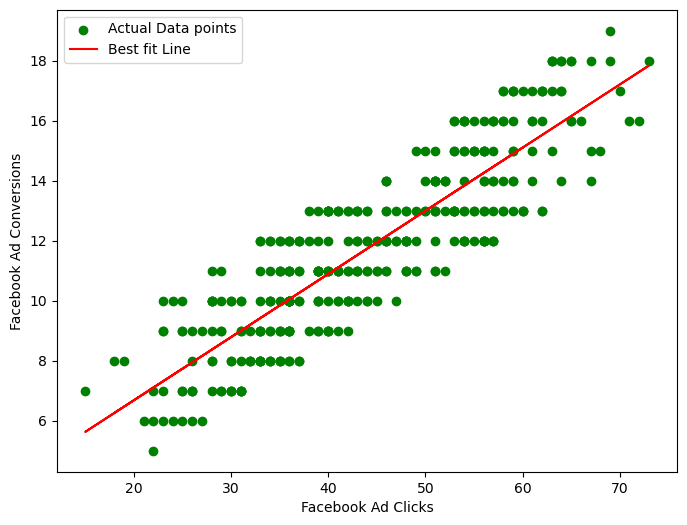

In [20]:
plt.figure(figsize=(8,6))
plt.scatter(x= df['Facebook Ad Clicks'],y=df['Facebook Ad Conversions'],color = 'green',label = 'Actual Data points')
plt.plot(df['Facebook Ad Clicks'],prediction, color  = 'red', label ='Best fit Line')
plt.xlabel('Facebook Ad Clicks')
plt.ylabel('Facebook Ad Conversions')
plt.legend()
plt.show()

In [24]:
#clk = input('Enter the click value:')
#clk = eval(clk)
#con = fitmodel.predict(clk)
#print('The conversion value is:',con)

def conversion_value(clk):
    con_value = fitmodel.predict([[clk]])
    return con_value

conversion_value(30)

array([[8.78506491]])

The model has a reasonably good predictive power, with r2 score as 76%. This suggests it can effectively predict Facebook ad conversions based on the number of Facebook ad clicks.

# Analyzing facebook campaign metrics over time

In [37]:
#cleaning data(removing unwanted symbols from the columns and converting them to numerical columns)
#df['Facebook Click-Through Rate (Clicks / View)'] = df['Facebook Click-Through Rate (Clicks / View)'].apply(lambda x: float(x[:-1]))
#df['Facebook Conversion Rate (Conversions / Clicks)'] = df['Facebook Conversion Rate (Conversions / Clicks)'].apply(lambda x: float(x[:-1]))
#df['Facebook Cost per Click (Ad Cost / Clicks)'] = df['Facebook Cost per Click (Ad Cost / Clicks)'].apply(lambda x : float(x[1:]))
#df['Cost per Facebook Ad'] = df['Cost per Facebook Ad'].apply(lambda x: float(x[1:]))

In [36]:
#data cleaning before analysis
# Convert CTR (remove % sign)
df['Facebook Click-Through Rate (Clicks / View)'] = df['Facebook Click-Through Rate (Clicks / View)'].replace('%','', regex=True).astype(float)

# Convert Conversion Rate (remove % sign)
df['Facebook Conversion Rate (Conversions / Clicks)'] = df['Facebook Conversion Rate (Conversions / Clicks)'].replace('%','', regex=True).astype(float)

# Convert Cost per Click (remove $ and , sign)
df['Facebook Cost per Click (Ad Cost / Clicks)'] = df['Facebook Cost per Click (Ad Cost / Clicks)'].replace('[$,]','', regex=True).astype(float)

# Convert Cost per Ad (remove $ and , sign)
df['Cost per Facebook Ad'] = df['Cost per Facebook Ad'].replace('[$,]','', regex=True).astype(float)

df.dtypes

Date                                               datetime64[ns]
Facebook Ad Campaign                                       object
Facebook Ad Views                                           int64
Facebook Ad Clicks                                          int64
Facebook Ad Conversions                                     int64
Cost per Facebook Ad                                      float64
Facebook Click-Through Rate (Clicks / View)               float64
Facebook Conversion Rate (Conversions / Clicks)           float64
Facebook Cost per Click (Ad Cost / Clicks)                float64
AdWords Ad Campaign                                        object
AdWords Ad Views                                            int64
AdWords Ad Clicks                                           int64
AdWords Ad Conversions                                      int64
Cost per AdWords Ad                                        object
AdWords Click-Through Rate (Clicks / View)                 object
AdWords Co

In [29]:
#filtering for facebook campaign
df2 = df[['Date','Facebook Ad Views','Facebook Ad Clicks','Facebook Ad Conversions','Cost per Facebook Ad',
         'Facebook Click-Through Rate (Clicks / View)','Facebook Conversion Rate (Conversions / Clicks)',
        'Facebook Cost per Click (Ad Cost / Clicks)']]

At what times of the month or days of the week do we observe the conversions?

In [31]:
#extracting month and week day from the date column
df2['month'] = df2['Date'].dt.month
df2['week'] = df2['Date'].dt.weekday
df2

,Date,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),month,week
0,2019-01-01,2116,18,8,126.0,0.83,42.73,7.14,1,1
1,2019-01-02,3106,36,12,104.0,1.15,34.04,2.91,1,2
2,2019-01-03,3105,26,8,102.0,0.84,31.45,3.89,1,3
3,2019-01-04,1107,27,9,71.0,2.45,34.76,2.62,1,4
4,2019-01-05,1317,15,7,78.0,1.10,47.59,5.38,1,5
...,...,...,...,...,...,...,...,...,...,...
360,2019-12-27,3240,51,13,63.0,1.57,25.89,1.24,12,4
361,2019-12-28,1510,69,18,97.0,4.55,25.82,1.42,12,5
362,2019-12-29,2918,44,13,49.0,1.50,29.11,1.11,12,6
363,2019-12-30,2212,37,8,102.0,1.68,22.70,2.75,12,0


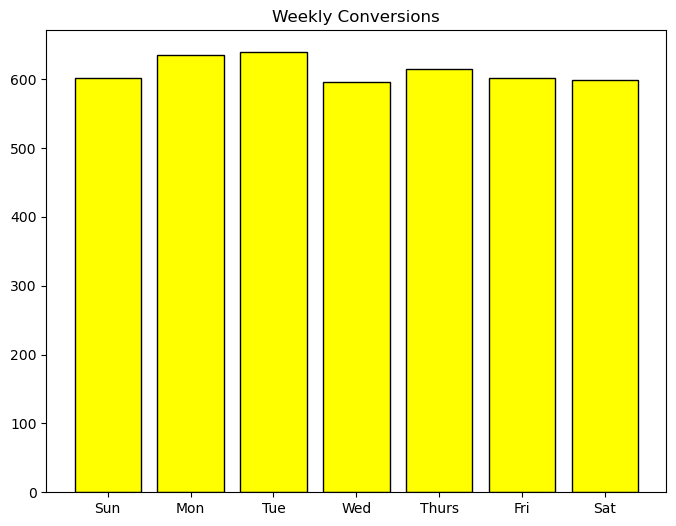

In [38]:
plt.figure(figsize=(8,6))
plt.title('Weekly Conversions')
weekly_conversion = df2.groupby('week')[['Facebook Ad Conversions']].sum()
week_names = ['Sun','Mon','Tue','Wed','Thurs','Fri','Sat']
plt.bar(week_names,weekly_conversion['Facebook Ad Conversions'],color = 'yellow',edgecolor ='black')
plt.show()

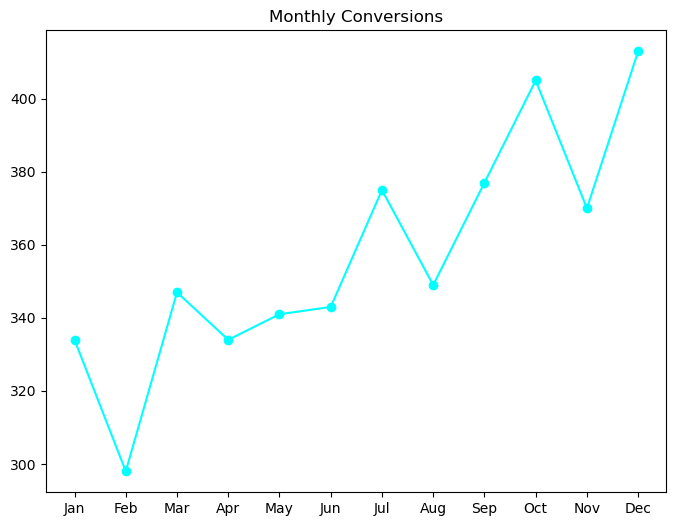

In [41]:
plt.figure(figsize=(8,6))
plt.title('Monthly Conversions')
monthly_conversion = df2.groupby('month')[['Facebook Ad Conversions']].sum()
month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.plot(month_names,monthly_conversion['Facebook Ad Conversions'],'-o',color = 'cyan')
plt.show()

How does the Cost per Conversion (CPC) change over time?

Cost per conversion (CPC): This metric is used to evaluate the cost effectiveness and profitability of online advertising campaign and helps marketers to understand how much they are spending on each conversion allowing them to optimize their spending.

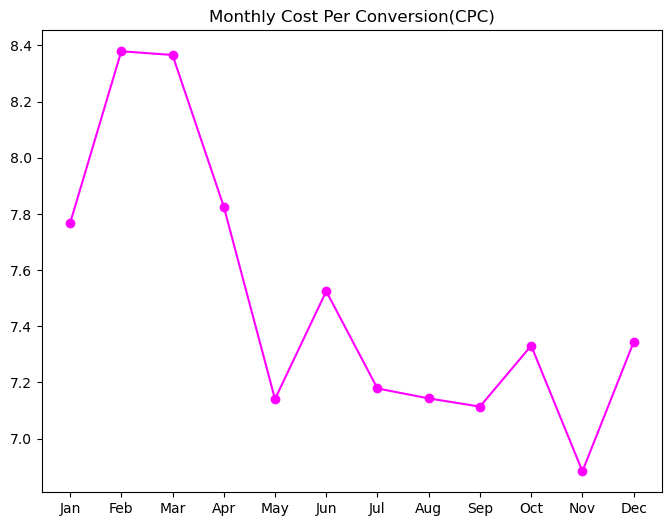

In [46]:
plt.figure(figsize=(8,6))
plt.title('Monthly Cost Per Conversion(CPC)')
monthly_df = df2.groupby('month')[['Cost per Facebook Ad','Facebook Ad Conversions']].sum()
monthly_df['Cost per Conversion'] = monthly_df['Cost per Facebook Ad']/monthly_df['Facebook Ad Conversions']
month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.plot(month_names,monthly_df['Cost per Conversion'],'-o',color='magenta')
plt.show()

Is there a long-term equilibrium relationship between advertising spend and conversion rates that suggests a stable,proportional impact of budget changes on conversions over time?

Null hypothesis: There is no relationship between advertising spend and conversion rates.

Alternate hypothesis: There is long term equilibrium relationship between advertising spend and conversion rates.

In [48]:
score,p_value,_ = coint(df2['Cost per Facebook Ad'],df['Facebook Ad Conversions'])
print('Cointegration test score:',score)
print('\np_value:',p_value)
if p_value<0.05:
    print('\n The p_value is less than 0.05 so we reject the null hypothesis')
else:
    print('\n The p_value is greater than 0.05 so we fail to reject the null hypothesis')

Cointegration test score: -14.755428385103224

p_value: 2.1337375979060563e-26

 The p_value is less than 0.05 so we reject the null hypothesis


There is a long-term relationship between advertising spend(cost) and conversion rates.